##### The essense of this note book to present some key findings from the Fordgobike dataset  in a the form of visualizations. To begin, we have to import the neccessary librairies, load the appriopriate data (the already cleaned dataset from the innitial assesment.e Part_I_notebook), and answer questions which will provide insights to the dataset

In [3]:
# import all packages and set plots to be embedded inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

In [4]:
# loading Data of interest
df_fgb_clean = pd.read_csv('df_fgb_clean.csv')

In [14]:
df_fgb_clean.head()

,Unnamed: 0,bike_id,user_type,member_birth_year,member_gender,member_age,start_station_id,start_time,start_date,start_hour_of_day,...,start_station_latitude,start_station_longitude,end_time,duration_sec,duration_in_minute,end_station_id,end_station_name,end_station_latitude,end_station_longitude,bike_share_for_all_trip
0,0,4902,Customer,1984.0,Male,35.0,21.0,2019-02-28 17:32:10.145,2019-02-28,17,...,37.789625,-122.400811,2019-03-01 08:01:55.975,52185,869.750000,13.0,Commercial St at Montgomery St,37.794231,-122.402923,False
1,2,5905,Customer,1972.0,Male,47.0,86.0,2019-02-28 12:13:13.218,2019-02-28,12,...,37.769305,-122.426826,2019-03-01 05:24:08.146,61854,1030.900000,3.0,Powell St BART Station (Market St at 4th St),37.786375,-122.404904,False
2,3,6638,Subscriber,1989.0,Other,30.0,375.0,2019-02-28 17:54:26.010,2019-02-28,17,...,37.774836,-122.446546,2019-03-01 04:02:36.842,36490,608.166667,70.0,Central Ave at Fell St,37.773311,-122.444293,False
3,4,4898,Subscriber,1974.0,Male,45.0,7.0,2019-02-28 23:54:18.549,2019-02-28,23,...,37.804562,-122.271738,2019-03-01 00:20:44.074,1585,26.416667,222.0,10th Ave at E 15th St,37.792714,-122.248780,True
4,5,5200,Subscriber,1959.0,Male,60.0,93.0,2019-02-28 23:49:58.632,2019-02-28,23,...,37.770407,-122.391198,2019-03-01 00:19:51.760,1793,29.883333,323.0,Broadway at Kearny,37.798014,-122.405950,False


##### Insight 1: How distributed are the user type within the dataset?


##### Insight 2: How distributed are the rides amongst the days of the week? and what is the peak ride time during the course of a day?

##### Insight 3: How does user type vary across the days of the week?


Answering the quesstions will provide some valuable insights to the dataset


#### Response to insight 1: 


In [26]:
def myCountplot(df,xVar,hue=None,color=1, palette=None,order=None):
    '''This fuction is writen to avoid code repeatition for the 'countplot method'. it will be called when needed
    '''
    
    #plot dimension
    plt.figure(figsize=[10, 6])
    #plot
    sns.countplot(data = df_fgb_clean , x = xVar, hue = hue, color = sns.color_palette('icefire')[color], palette=palette, order=order, edgecolor = 'black');
    xVar=xVar.replace('_',' ' ) # code replaces _ with space
    if hue:
        hue=hue.replace('_',' ')
    #adding title to plot
    plt.title(f'''Distribution of {xVar} {'by' if hue else ''} {hue if hue else ''}'''.title(), fontsize=14, weight = 'bold')
    plt.xlabel(xVar.title(), fontsize = 10, weight = 'bold')

    plt.ylabel('Frequency'.title(), fontsize=10, weight = 'bold')
    return myCountplot

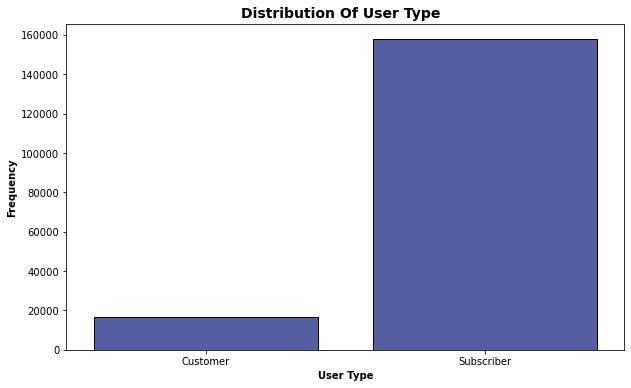

In [27]:
#Constructing a plot of the user-type against their respective counts in the data set helps answer the question. 
# the countplot method of the seaborn library is helpful in chieving that

myCountplot(df_fgb_clean, 'user_type');

>Almost all the riders are subcribers (~160000) with only less than 20000 being customers.

#### Response to insight 2: 

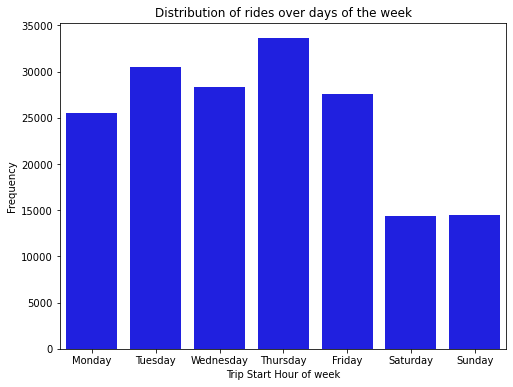

In [28]:
# trip distribution over week
# first lets define a list with the days of the week
days_order = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']

dayscat = pd.api.types.CategoricalDtype(ordered=True, categories=days_order)
df_fgb_clean['start_day_of_week'] = df_fgb_clean['start_day_of_week'].astype(dayscat)
sns.countplot(data=df_fgb_clean, x='start_day_of_week', color='blue');
plt.title('Distribution of rides over days of the week')
plt.xlabel('Trip Start Hour of week');
plt.ylabel('Frequency');
plt.gcf().set_size_inches(8,6)

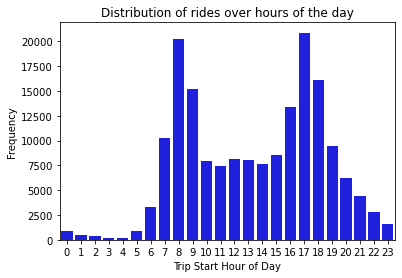

In [29]:
# ride distribution over hours of the day to discover the peak ride time of a day
sns.countplot(data=df_fgb_clean, x='start_hour_of_day', order = sorted(df_fgb_clean['start_hour_of_day'].unique()), color='blue');
plt.title('Distribution of rides over hours of the day')
plt.xlabel('Trip Start Hour of Day');
plt.ylabel('Frequency');

From the analysis and visualizations done, one can say the were more trips on weekdays(Monday - friday) than at the weekend (saturday and Saturday)  and the peak times of rides were between 8am and 5pm with 8am and 5pm being the busiest hours of rides. 

#### Response to Insight 3
> A display of the user types across the days of the week will be isigntful to asnwer the posted question

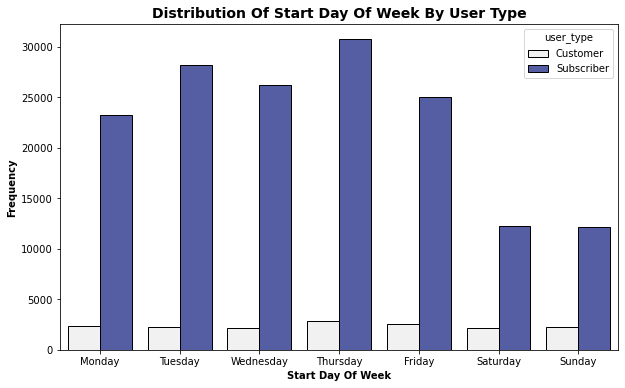

In [30]:
myCountplot(df_fgb_clean, 'start_day_of_week', hue = 'user_type');

>Plot demonstrates that there are more users who are subscribers than just ordinary customers and the bar charts reveal they ride more on week days than on weekends. Unlike users who are just ordinary customers that do not have a clear pattern of when they preferably ride. One can not say for sure what cause this patterns but i guess the reason why there are more subscribed customers is probably because the subcription deals are perhaps better that ordinary customer deals.